In [1]:
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, DateTime, REAL
from sqlalchemy.orm import sessionmaker
import sqlalchemy

import MySQLdb

import jsonify
import json

import pickle

In [2]:
%matplotlib inline

In [35]:
colors = pd.read_csv('data/codis_info.csv')

In [27]:
for col in colors.columns:
    if col in ['color1_ratio', 'color2_ratio', 'color3_ratio']:
        continue
        
    colors[col] = colors[col].astype(int)

In [28]:
def get_hdex(r, g, b):
    return '#%02x%02x%02x' % ( r, g, b)

def hex_to_rgb(h): 
    h = h.lstrip('#')
    return tuple(int(h[i:i+2], 16) for i in (0, 2 ,4))


In [29]:
rgb_hex_ls = []
for i in range(len(colors)):
    row = colors.iloc[i].astype(int)
    c1 = '#%02x%02x%02x' % ( row['color1_R'], row['color1_G'], row['color1_B'])
    c2 = '#%02x%02x%02x' % ( row['color2_R'], row['color2_G'], row['color2_B'])
    c3 = '#%02x%02x%02x' % ( row['color3_R'], row['color3_G'], row['color3_B'])  
    rgb_hex_ls.append([c1, c2, c3])

In [36]:
colors = colors.sort_values(by=['color1_R','color1_G','color1_B'])

In [37]:
color_1 = colors.filter(['color1_R','color1_G','color1_B']).values

In [38]:
from PIL import Image, ImageDraw 
def view_color(rgb):
    w, h = 5, 1

    img = Image.new('RGB',(w,h), rgb)

    plt.grid(False)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [39]:
def rgb2hsv(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = df/mx
    v = mx
    return np.array([h, s, v])

In [40]:
hvs_ls = []
scatter_cmap = []
for idx in range(len(color_1)):
    
    r = color_1[idx][0]
    g = color_1[idx][1]
    b = color_1[idx][2]
    
    scatter_cmap.append([r,g,b])
    hvs_ls.append(rgb2hsv(r, g, b))
hvs_ls = np.vstack(hvs_ls)

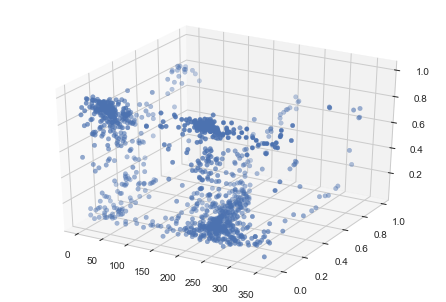

In [41]:
fig = plt.figure()
ax = Axes3D(fig)
 
ax.scatter(hvs_ls[:,0], hvs_ls[:,1], hvs_ls[:,2])
plt.show()

In [43]:
colors.filter(['color1_R','color1_G','color1_B'])

,color1_R,color1_G,color1_B
554,2.009221,74.271729,170.414689
285,3.024331,68.414165,173.464755
88,3.291565,73.048278,157.582316
834,4.023766,88.018778,181.265532
725,11.715340,12.361424,12.623301
1086,12.143822,12.269680,12.214073
897,13.233783,13.004555,13.053571
871,13.243281,12.509903,14.332561
391,15.655418,15.261776,14.535779
225,16.742693,18.042987,18.277877


In [44]:
colordf = pd.DataFrame(rgb_hex_ls) 

In [45]:
mc1 = pd.concat([colors['name'], colordf[0], colors['color1_ratio']], axis=1).rename(columns={0:'color','color1_ratio':'ratio'})
mc2 = pd.concat([colors['name'], colordf[1], colors['color2_ratio']], axis=1).rename(columns={1:'color','color2_ratio':'ratio'})
mc3 = pd.concat([colors['name'], colordf[2], colors['color3_ratio']], axis=1).rename(columns={2:'color','color3_ratio':'ratio'})

In [46]:
mapping_codi_color = pd.concat([mc1,mc2,mc3])

In [47]:
color_df = pd.DataFrame(list(set(mapping_codi_color['color'])), columns=['color'])

In [ ]:
with open('pw.pw', 'rb') as f:
    pw = pickle.load(f)

ip = '127.0.0.1'
db = 'codi'

In [49]:
engine = sqlalchemy.create_engine("mysql+mysqldb://root:"+pw+"@"+ip+"/"+db)

In [106]:
color_df.to_sql(name='colors', con=engine, if_exists='replace', index_label='id')

In [112]:
color_df['id2'] = color_df.index

In [115]:
mapping_codi_color = mapping_codi_color.merge(right=color_df, how='inner', on='color')

In [119]:
mapping_codi_color = mapping_codi_color.drop(columns=['color']).rename(columns={'id2':'id_color', 'name':'id_codi'})

In [121]:
mapping_codi_color.to_sql(name='mapping_codi_color', con=engine, if_exists='replace', index_label='id')

In [335]:
# __tablename__ : 데이터베이스의 테이블 이름

Base = declarative_base()

class Codis(Base):
    __tablename__ = 'codis'

    id = Column(Integer, primary_key=True)
    rank = Column(Integer)
    id_codi = Column(Integer)
    img = Column(String)
    link = Column(String)
    tag = Column(String)
    
    def __init__(self, id, rank, id_codi, img, link, tag):
        self.id = id
        self.rank = rank
        self.id_codi = id_codi
        self.img = img
        self.link = link
        self.tag = tag
    
    def __repr__(self):
        return "<Codi {}, {}, {}, {}, {}>".format(self.id, self.rank, self.id_codi, self.img, self.link, self.tag)
    
    
class Colors(Base):
    __tablename__ = 'colors'

    id = Column(Integer, primary_key=True) 
    color = Column(String) 
    
    def __init__(self, id, color):
        self.id = id
        self.color = color 
    
    def __repr__(self):
        return "<Color {}, {}>".format(self.id, self.color)
    

class Tags(Base):
    __tablename__ = 'tags'
    
    id = Column(Integer, primary_key=True)
    tag = Column(String)
    
    def __init__(self, id, tag):
        self.id = id
        self.tag = tag
    
    def __repr__(self):
        return "<Tag {}, {}>".format(self.id, self.tag)
    
    
class Items(Base):
    __tablename__ = 'items'

    id = Column(Integer, primary_key=True) 
    id_item = Column(Integer) 
    id_codi = Column(Integer)
    name = Column(String)
    brand = Column(String)
    price = Column(Integer)
    img = Column(String)
    
    def __init__(self, id, id_item, id_codi, name, brand, price, img):
        self.id = id
        self.id_item = id_item
        self.id_codi = id_codi
        self.name = name
        self.brand = brand
        self.price = price
        self.img = img
    
    def __repr__(self):
        return "<item {}, {}, {}, {}, {}, {}, {}>".format(self.id, self.id_item, self.id_codi, self.name, self.brand, self.price, self.img)
    
    
    
class MapColor(Base):
    __tablename__ = 'mapping_codi_color'
    
    id = Column(Integer, primary_key=True)
    id_codi = Column(Integer)
    ratio = Column(REAL)
    id_color = Column(Integer)
    
    def __init__(id, id_coid, ratio, id_color):
        self.id = id
        self.id_codi = id_coid
        self.ratio = ratio
        self.id_color = id_color
        
    def __repr__(self):
        return "<mapColor {}, {}, {}, {}>".format(self.id, self.id_codi, self.ratio, self.id_color)
    
    
class MapTag(Base):
    __tablename__ = 'mapping_codi_tag'
    
    id = Column(Integer, primary_key=True)
    id_codi = Column(Integer) 
    id_tag = Column(Integer)
    
    def __init__(id, id_coid, id_tag):
        self.id = id
        self.id_codi = id_coid 
        self.id_tag = id_tag
        
    def __repr__(self):
        return "<maptag {}, {}, {}>".format(self.id, self.id_codi, self.id_tag)
    
    
class MapItem(Base):
    __tablename__ = 'mapping_codi_item'
    
    id = Column(Integer, primary_key=True)
    id_codi = Column(Integer) 
    id_item = Column(Integer)
    
    def __init__(id, id_coid, id_item):
        self.id = id
        self.id_codi = id_coid 
        self.id_item = id_item
        
    def __repr__(self):
        return "<mapitem {}, {}, {}>".format(self.id, self.id_codi, self.id_item)
    
    
class ViewCodiColor(Base):
    __tablename__ = 'view_codi_color'
     
    id_codi = Column(Integer, primary_key=True)
    ratio = Column(REAL)
    color = Column(String)
    
    def __init__(id_codi, ratio, color):
        self.id_codi = id_codi
        self.ratio = ratio
        self.color = color
    
    def __repr__(self):
        return "<viewcolor {}, {}, {}>".format(self.id_codi, self.ratio, self.color)
    

In [53]:
from sqlalchemy.ext.declarative import DeclarativeMeta
class AlchemyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj.__class__, DeclarativeMeta):
            # an SQLAlchemy class
            fields = {}
            for field in [x for x in dir(obj) if not x.startswith('_') and x != 'metadata']:
                data = obj.__getattribute__(field)
                try:
                    json.dumps(data) # this will fail on non-encodable values, like other classes
                    fields[field] = data
                except TypeError:
                    fields[field] = None
            # a json-encodable dict
            return fields

        return json.JSONEncoder.default(self, obj)

In [54]:
# make session
Session = sessionmaker(bind=engine)
session = Session()

In [55]:
def disp(datas):
    for data in datas:
        print(data)
 

In [56]:
results = session.query(Colors).all()
results[:5]

[<Color 0, #e5e4e9>,
 <Color 1, #97adad>,
 <Color 2, #e2e3e3>,
 <Color 3, #625e4e>,
 <Color 4, #3c5279>]

In [361]:
session.query(ViewCodiColor).filter(ViewCodiColor.id_codi == 395660).all()

[<viewcolor 395660, 0.760519575557995, #e9e9e7>]

In [391]:
def get_codi_tag(id_codi):
    SQL_QUERY = """
        SELECT *
        FROM view_codi_tag
        where id_codi = {};
    """.format(id_codi)
      
    curs = db.cursor()
    count = curs.execute(SQL_QUERY)
    rows = curs.fetchall()
    return rows

In [383]:
def get_codi_color(id_codi):
      
    SQL_QUERY = """
        SELECT *
        FROM view_codi_color
        where id_codi = {};
    """.format(id_codi)
      
    curs = db.cursor()
    count = curs.execute(SQL_QUERY)
    rows = curs.fetchall()
    return rows

In [395]:
db = MySQLdb.connect(
"127.0.0.1",
"root",
pw,
"codi",
charset='utf8',
) 

In [396]:
set(get_codi_color(395660))

{(395660, 0.0372809692238891, '#1f1f20'),
 (395660, 0.202199455218116, '#99a1b4'),
 (395660, 0.760519575557995, '#e9e9e7')}

In [397]:
set(get_codi_tag(395660))

{(395660, '남친룩'), (395660, '코디'), (395660, '평범하게')}

In [250]:
session.query(MapColor) \
.join(Colors, MapColor.id_color == Colors.id) \
.join(Codis, MapColor.id_codi == Codis.id_codi)\
.filter(Colors.color.like("#3076bb")).all()

[<mapColor 1271, 395488, 0.368486514794449, 1677>]

In [260]:
session.query(Codis) \
.join(MapColor, MapColor.id_codi == Codis.id_codi) \
.join(Colors, MapColor.id_color == Colors.id) \
.filter(Colors.color.like("#3076bb")).all()

[<Codi 1462, 1364, 395488, http://img.mapssi.com/codi/yjh6782@naver_com1521506804476.jpg, http://www.mapssi.com/mapssi_web/codi_detail.php?codiNo=395488>]

In [326]:
session.query(Colors) \
.join(MapColor, MapColor.id_color == Colors.id) \
.join(Codis, MapColor.id_codi == Codis.id_codi) \
.filter(Codis.id_codi == (395660)).all()

[<Color 388, #e9e9e7>, <Color 2791, #99a1b4>, <Color 500, #1f1f20>]

In [59]:
datas = json.loads(json.dumps(results, cls=AlchemyEncoder))

In [329]:
def get_similar_color(hexcode):
    cinput = hex_to_rgb(hexcode)
    
    view_color(cinput)
    
    rgb_ls = []
    hex_ls = []
    for color in results:
        rgb_ls.append( np.array(hex_to_rgb(color.color)))
        hex_ls.append(color.color)
     
    rgb_ls = np.vstack(rgb_ls)
    
    cinput = np.repeat(np.array(cinput).reshape(1, 3), len(rgb_ls), axis=0)
    uc = np.sqrt(np.sum((rgb_ls - cinput)**2, axis=1)) 
    datacom = pd.DataFrame([uc, hex_ls]).T

 
    datacom = datacom.sort_values(0) 
    #datacom = datacom[datacom[0] < 50]
     
    sdata = datacom[:5][1].values 
 
     
        
    res = session.query(Codis) \
    .join(MapColor, MapColor.id_codi == Codis.id_codi) \
    .join(Colors, MapColor.id_color == Colors.id) \
    .filter(Colors.color.in_(sdata)).all()
        
    #find_codi_ls.extend(res)
    
    rgb_ls=[]
    for codi in res:
        
        rgbs = session.query(Colors) \
        .join(MapColor, MapColor.id_color == Colors.id) \
        .join(Codis, MapColor.id_codi == Codis.id_codi) \
        .filter(Codis.id_codi == (codi.id_codi)).all()
        
        rgb_ls.append(rgbs)
    return res, rgb_ls
    # 컬러에 해당하는 코디 찾기

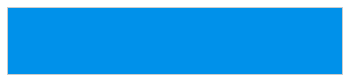

In [330]:
codis, rgb_ls = get_similar_color('#0091ea')

In [332]:
rgb_ls

[[<Color 1779, #4b80b6>, <Color 514, #1d1e21>, <Color 226, #e7eaed>],
 [<Color 2803, #0458b5>, <Color 2607, #e9e9ed>, <Color 1220, #46453b>],
 [<Color 2803, #0458b5>, <Color 2607, #e9e9ed>, <Color 1220, #46453b>],
 [<Color 2649, #18191b>, <Color 1677, #3076bb>, <Color 2392, #edeff0>],
 [<Color 777, #fbfbfb>, <Color 1911, #3875b0>, <Color 992, #cdd3e1>],
 [<Color 2467, #181826>, <Color 1651, #bdc9ce>, <Color 1424, #1e48b7>]]